In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tqdm import tqdm
%matplotlib inline

# load data

In [ ]:
train_data= tfds.load("fashion_mnist", split="train", batch_size=64, shuffle_files=True)
test_data= tfds.load("fashion_mnist", split="test", batch_size=64, shuffle_files=True)

In [39]:
def base_model():
    inputs = tf.keras.Input(shape=(28, 28), name='digits')
    x = tf.keras.layers.Flatten(name='flatten_layer')(inputs)
    x = tf.keras.layers.Dense(784, activation='relu', name='dense_1')(x)
    x = tf.keras.layers.Dense(128, activation='relu', name='dense_2')(x)
    outputs = tf.keras.layers.Dense(10, activation='softmax', name='prediction')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

In [40]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

In [41]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

# gradient descent

In [14]:
def apply_gradient(optimizer, model, x, y):
    with tf.GradientTape() as tape:
        logits = model(x)
        loss_value = loss_object(y_true=y, y_pred=logits)
    
    gradients = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    
    return logits, loss_value

In [51]:
def train_data_one_epoch():
    losses = []
    pbar = tqdm(total=len(list(enumerate(train_data))), position=0, leave=True, bar_format='{l_bar}{bar}|{n_fmt}/{total_fmt}')
    for data in list(train_data):
        x_train = data['image'] / 255 # you have to do this or convert to float
        y_train = data['label']
        logits, loss_value = apply_gradient(optimizer, model, x_train, y_train)
        
        losses.append(loss_value)
        
        train_acc_metric(y_train, logits)
        # pbar.set_description(f'Training loss: {float(loss_value)}')
        pbar.update()
    
    pbar.close()
    
    return losses

In [48]:
def perform_validation():
    losses = []
    for data in list(test_data):
        val_logits = model(data['image'] / 255)
        val_loss = loss_object(y_true=data['label'], y_pred=val_logits)
        val_acc_metric(data['label'], y_pred=val_logits)
        losses.append(val_loss)
    return losses

# main

In [52]:
model = base_model()

epochs = 10

acc_l = []
loss_l = []

for epoch in range(epochs):
    losses_train = train_data_one_epoch()
    train_acc = train_acc_metric.result()
    
    losses_val = perform_validation()
    val_acc = val_acc_metric.result()
    
    losses_train_mean = np.mean(losses_train)
    losses_val_mean = np.mean(losses_val)
    
    acc_l.append(train_acc)
    loss_l.append(losses_train_mean)
    
    # print(f'epoch {epoch} training loss: {losses_train_mean}, acc: {train_acc}, \
    # val_loss: {losses_val_mean}, val_acc: {val_acc}')
    
    train_acc_metric.reset_states()
    val_acc_metric.reset_states()

100%|██████████|938/938


epoch 0 training loss: 0.46473371982574463, acc: 0.8347833156585693,     val_loss: 0.4112408459186554, val_acc: 0.8489999771118164


100%|██████████|938/938


epoch 1 training loss: 0.3394627273082733, acc: 0.8759166598320007,     val_loss: 0.36440664529800415, val_acc: 0.8664000034332275


100%|██████████|938/938


epoch 2 training loss: 0.3072499632835388, acc: 0.886816680431366,     val_loss: 0.3380683958530426, val_acc: 0.8766000270843506


100%|██████████|938/938
100%|██████████|938/938
100%|██████████|938/938
100%|██████████|938/938


epoch 3 training loss: 0.2837750315666199, acc: 0.8959166407585144,     val_loss: 0.3369562327861786, val_acc: 0.8794999718666077


100%|██████████|938/938


epoch 4 training loss: 0.268069326877594, acc: 0.9012166857719421,     val_loss: 0.34152230620384216, val_acc: 0.8758999705314636


100%|██████████|938/938


epoch 5 training loss: 0.25036340951919556, acc: 0.9063166379928589,     val_loss: 0.32994699478149414, val_acc: 0.8784999847412109


100%|██████████|938/938


epoch 6 training loss: 0.23900215327739716, acc: 0.910099983215332,     val_loss: 0.33756497502326965, val_acc: 0.8781999945640564


100%|██████████|938/938


epoch 7 training loss: 0.22902624309062958, acc: 0.9133333563804626,     val_loss: 0.32231396436691284, val_acc: 0.8840000033378601


100%|██████████|938/938


epoch 8 training loss: 0.21452493965625763, acc: 0.9188666939735413,     val_loss: 0.32985982298851013, val_acc: 0.8830999732017517


100%|██████████|938/938


epoch 9 training loss: 0.20845840871334076, acc: 0.9217666387557983,     val_loss: 0.33440229296684265, val_acc: 0.885200023651123


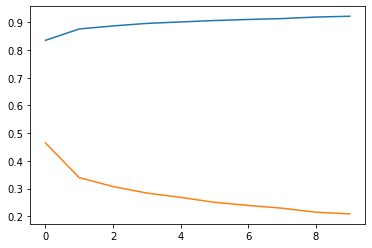

In [53]:
plt.plot(acc_l)
plt.plot(loss_l)